<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
cd ../

/Users/merad/Documents/wildwood


In [49]:
#from wildwood.dataset import loaders_small_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle

%config Completer.use_jedi = False
%matplotlib inline

In [50]:
with open("experiments/ntrees_experiment_2021-05-05-11:10:09.pickle", 'rb') as f:
    dictionary = pickle.load(f)

df = dictionary['results']

In [51]:
set(df.dataset.values)

{'adult', 'bank', 'default-cb', 'spambase'}

In [52]:
df = (df.groupby(['dataset', 'classifier', 'classifier_title', 'n_trees']).mean()).reset_index([0,1, 2, 3])

In [64]:

def plot_comparison_n_trees(df, metric="roc_auc", filename=None, legend=True):
    #df["dataset"].unique()
    g = sns.FacetGrid(
        df, col="dataset", col_wrap=4, aspect=1, height=4, sharex=True, sharey=False
    )
    g.map(
        sns.lineplot,
        "n_trees",
        metric,
        "classifier",
        lw=4,
        marker="o",
        markersize=10,
        #palette=classifier_colors,
    ).set(yscale="log", xlabel="", ylabel="")

    axes = g.axes.flatten()

    for i, dataset in enumerate(df["dataset"].unique()):
        #axes[i].set_xticklabels([0, 1, 2, 5, 10, 20, 50], fontsize=14)
        axes[i].set_title(dataset, fontsize=18)

    if legend:
        plt.legend(
            list(df["classifier_title"].unique()),
            bbox_to_anchor=(0.3, 0.7, 1.0, 0.0),
            loc="upper right",
            ncol=1,
            borderaxespad=0.0,
            fontsize=14,
        )

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename)
        #logging.info("Saved figure in " + filename)
    else:
        plt.show()


In [65]:
from time import time

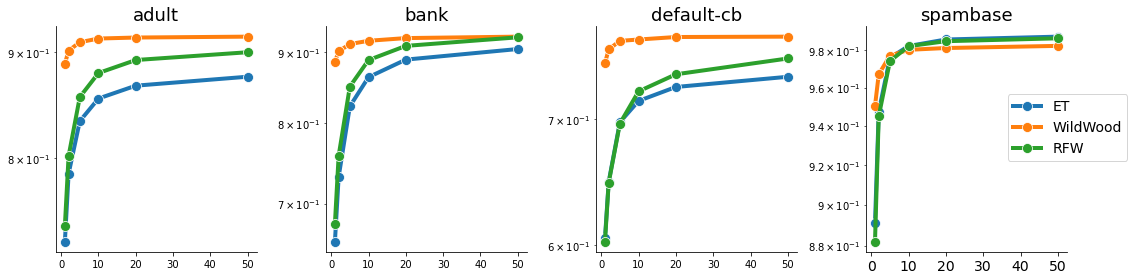

In [66]:
plot_comparison_n_trees(df, metric="roc_auc", filename="fig_n_trees"+str(time())+".pdf")